23 343
24 342
25 340
26 339
27 338
28 336
29 335
30 334
31 333
32 331
33 330
34 329
35 327
36 326
37 325
38 324
39 322
40 321
41 124
42 125
43 127
44 128
45 129
46 131
47 132
48 134
49 135
50 137
51 138
52 139
53 141
54 142
55 144
56 145
57 147
58 148
59 149
60 151
61 152
62 154
63 155
64 156
65 158
66 159
67 161
68 162
69 164
70 165
71 166
72 168
73 169
74 171
75 172
76 174
77 175
78 176
79 178
80 179
81 181
82 182
83 183
84 185
85 186
86 188
87 189
88 191
89 192
90 193
91 195
92 196
93 198
94 199
95 201
96 202
97 203
98 205
99 206
100 208
101 209
102 210
103 212
104 213
105 215
106 216
107 218
108 219
109 220
110 222
111 223
112 225
113 226
114 226
115 225
116 223
117 222
118 221
119 219
120 218
121 217
122 215
123 214
124 213
125 212
126 210
127 209
128 208
129 206
130 205
131 204
132 203
133 201
134 200
135 199
136 197
137 196
138 195
139 194
140 192
141 191
142 190
143 188
144 187
145 186
146 185
147 183
148 182
149 181
150 179
151 178
152 177
153 176
154 174
155 173
156 172
157 1

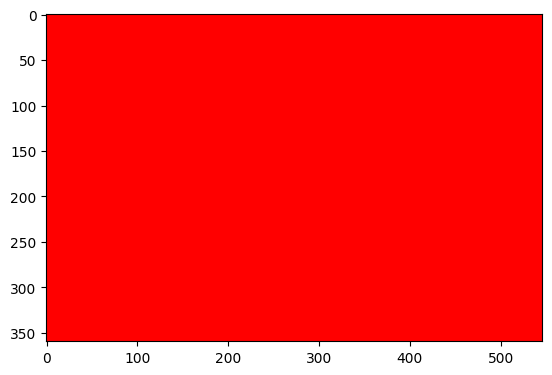

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(image, seed):
    height, width = image.shape
    visited = np.zeros((height, width), dtype=bool)
    result = np.zeros_like(image)
    stack = [seed]

    for x in range(height):
        for y in range(width):
            if(image[x,y] == 0):
                print (x,y)
                break 

    for x in range(height):
        for y in range(width):
            
            while stack:
                print("ay hadja")
                x, y = stack.pop()
                if visited[x, y]:
                    continue

                visited[x, y] = True

        
                if (image[x, y] == 0):
                    result[x, y] = 255  
                    neighbors = [
                        (x - 1, y),
                        (x + 1, y),
                        (x, y - 1),
                        (x, y + 1)
                    ]

                    for nx, ny in neighbors:
                        if 0 <= nx < height and 0 <= ny < width and not visited[nx, ny]:
                            stack.append((nx, ny))


    

    return result

image = cv2.imread('fig2.png', cv2.IMREAD_GRAYSCALE)
seed = (0, 0)  

result = region_growing(image, seed)
unique_classes = np.unique(result)
colored_result = np.zeros((result.shape[0], result.shape[1], 3), dtype=np.uint8)

class_colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0), (255, 255, 0), (255, 0, 255)]

for i, cls in enumerate(unique_classes):
    colored_result[result == cls] = class_colors[i]

print(unique_classes)
plt.imshow(cv2.cvtColor(colored_result, cv2.COLOR_BGR2RGB))
plt.show()
